In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train.csv')  # or your downloaded filename

In [ ]:
# Step 2: Inspect basic info
print("Rows, columns:", df.shape) # rows and columns
print("Column names:", df.columns.tolist())
print(df.info())    # datatypes
print(df.describe()) # statistics summary

Rows, columns: (21263, 82)
Column names: ['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass', 'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass', 'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass', 'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie', 'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie', 'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie', 'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius', 'wtd_gmean_atomic_radius', 'entropy_atomic_radius', 'wtd_entropy_atomic_radius', 'range_atomic_radius', 'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius', 'mean_Density', 'wtd_mean_Density', 'gmean_Density', 'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density', 'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density', 'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity', 'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity', 'entropy_Elect

In [34]:
print(df.isnull().sum())

number_of_elements       0
mean_atomic_mass         0
wtd_mean_atomic_mass     0
gmean_atomic_mass        0
wtd_gmean_atomic_mass    0
                        ..
range_Valence            0
wtd_range_Valence        0
std_Valence              0
wtd_std_Valence          0
critical_temp            0
Length: 82, dtype: int64


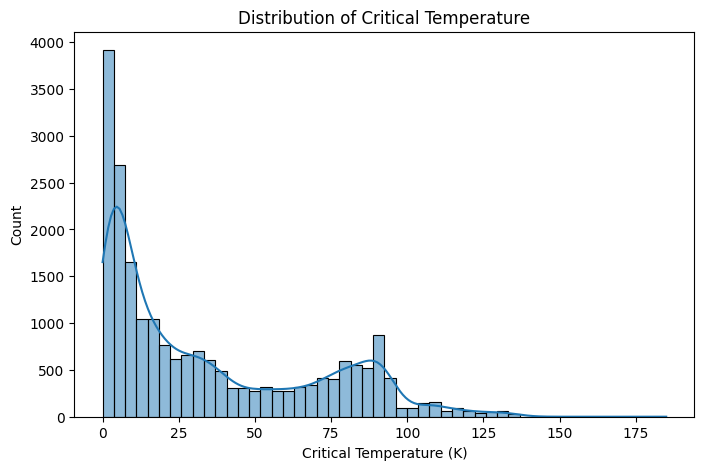

In [39]:
plt.figure(figsize=(8,5))
sns.histplot(df["critical_temp"], bins=50, kde=True)
plt.title("Distribution of Critical Temperature")
plt.xlabel("Critical Temperature (K)")
plt.ylabel("Count")
plt.show()

critical_temp                  1.000000
wtd_std_ThermalConductivity    0.721271
range_ThermalConductivity      0.687654
range_atomic_radius            0.653759
std_ThermalConductivity        0.653632
wtd_entropy_atomic_mass        0.626930
wtd_entropy_atomic_radius      0.603494
number_of_elements             0.601069
range_fie                      0.600790
wtd_std_atomic_radius          0.599199
Name: critical_temp, dtype: float64
gmean_FusionHeat       -0.431795
wtd_gmean_FusionHeat   -0.432365
wtd_mean_Density       -0.433940
wtd_range_Valence      -0.439901
wtd_gmean_Density      -0.540046
gmean_Density          -0.541684
gmean_Valence          -0.573068
mean_Valence           -0.600085
wtd_gmean_Valence      -0.615653
wtd_mean_Valence       -0.632401
Name: critical_temp, dtype: float64


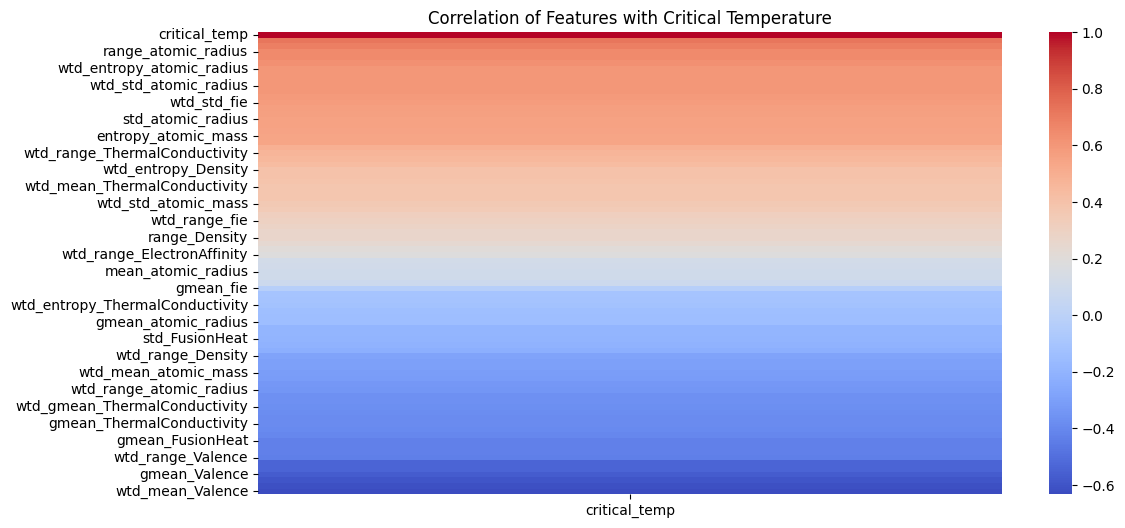

In [44]:
plt.figure(figsize=(12,6))
correlation = df.corr()["critical_temp"].sort_values(ascending=False)
print(correlation.head(10))  # Top 10 features positively correlated
print(correlation.tail(10))  # Negatively correlated

sns.heatmap(df.corr()[["critical_temp"]].sort_values(by="critical_temp", ascending=False),
            cmap="coolwarm", annot=False)
plt.title("Correlation of Features with Critical Temperature")
plt.show()


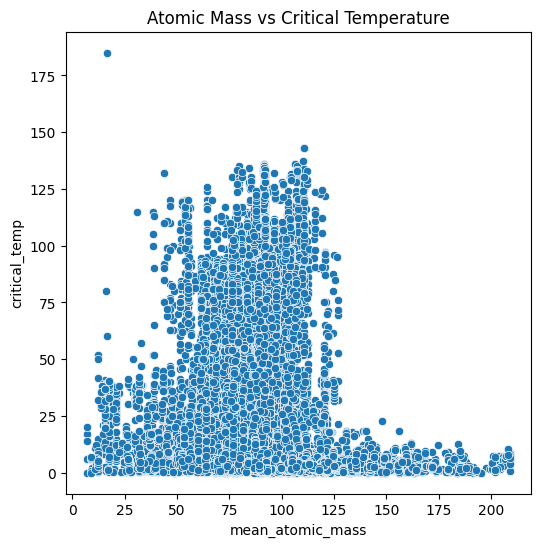

In [49]:
plt.figure(figsize=(6,6))
sns.scatterplot(x="mean_atomic_mass", y="critical_temp", data=df)
plt.title("Atomic Mass vs Critical Temperature")
plt.show()


In [50]:
# Step 3: Look at first few rows
print(df.head())


   number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0                   4         88.944468             57.862692   
1                   5         92.729214             58.518416   
2                   4         88.944468             57.885242   
3                   4         88.944468             57.873967   
4                   4         88.944468             57.840143   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0          66.361592              36.116612             1.181795   
1          73.132787              36.396602             1.449309   
2          66.361592              36.122509             1.181795   
3          66.361592              36.119560             1.181795   
4          66.361592              36.110716             1.181795   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  \
0                 1.062396          122.90607              31.794921   
1                 1.057755          122.90607           

In [51]:

# Step 4: Summary stats of critical temperature (Tc)

if 'critical_temp' in df.columns:
    print(df['critical_temp'].describe())
    
elif 'Tc' in df.columns:
    print(df['Tc'].describe())


count    21263.000000
mean        34.421219
std         34.254362
min          0.000210
25%          5.365000
50%         20.000000
75%         63.000000
max        185.000000
Name: critical_temp, dtype: float64


In [52]:
# Check size of dataset
print("Shape:", df.shape)

# Summary statistics
print(df.describe())

# Check missing values
print(df.isnull().sum())



Shape: (21263, 82)
       number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
count        21263.000000      21263.000000          21263.000000   
mean             4.115224         87.557631             72.988310   
std              1.439295         29.676497             33.490406   
min              1.000000          6.941000              6.423452   
25%              3.000000         72.458076             52.143839   
50%              4.000000         84.922750             60.696571   
75%              5.000000        100.404410             86.103540   
max              9.000000        208.980400            208.980400   

       gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
count       21263.000000           21263.000000         21263.000000   
mean           71.290627              58.539916             1.165608   
std            31.030272              36.651067             0.364930   
min             5.320573               1.960849             0.000000   

In [53]:
# Example: distribution of bandgap
import matplotlib.pyplot as plt

df.columns = df.columns.str.strip()   # remove extra spaces
print(df.columns)

plt.hist(df['Bandgap'], bins=50)   # exact name from df.columns

plt.xlabel("Bandgap (eV)")
plt.ylabel("Count of Materials")
plt.title("Distribution of Bandgaps in Materials Dataset")
plt.show()


Index(['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_

KeyError: 'Bandgap'